# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
pip install nrclex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 5.1 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43328 sha256=5123f52c00310d0afdd10b3cf73fa3ea085720d138f98e2d2ed7e44b0d6d247d
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 39.7 MB/s 
     |████████████████████████████████| 163 kB 65.8 MB/s 


In [ ]:
# Import Libraries
from nrclex import NRCLex
import inflect
p = inflect.engine()
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# READ THE CSV FILE
movie_reviews = pd.read_csv("/content/drive/MyDrive/my_project_work/14kfinally.csv", index_col=0)

movie_reviews.isnull().values.any()

movie_reviews.shape

(14915, 1)

In [ ]:
movie_reviews

,text
0,I saw an ad where @aproko_doctor was promoting...
1,I jus watched @aproko_doctor on my tv nowâ¦ a...
2,@aproko_doctor I saw u on TV advertising covid...
3,I love this Covid 19 vaccine ad on radio simpl...
4,@aproko_doctor So on point.\nI think you need ...
...,...
6024,Researchers become their own lab rats with DIY...
6025,They've thrown taxpayers money at it but it's ...
6026,Do you still have health insurance? #COVID19 #...
6027,Safe vaccines for #COVID19 doesnât mean effe...


In [ ]:
movie_reviews = movie_reviews.replace('\n',' ', regex=True)

In [ ]:
movie_reviews

,text
0,I saw an ad where @aproko_doctor was promoting...
1,I jus watched @aproko_doctor on my tv nowâ¦ a...
2,@aproko_doctor I saw u on TV advertising covid...
3,I love this Covid 19 vaccine ad on radio simpl...
4,@aproko_doctor So on point. I think you need t...
...,...
6024,Researchers become their own lab rats with DIY...
6025,They've thrown taxpayers money at it but it's ...
6026,Do you still have health insurance? #COVID19 #...
6027,Safe vaccines for #COVID19 doesnât mean effe...


In [ ]:
#Create Function to clean Tweets
def cleanTxt(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = re.sub('"', '', text)
    return text

In [ ]:
movie_reviews['text'] = movie_reviews['text'].apply(cleanTxt)

In [ ]:
movie_reviews

,text
0,i saw an ad where doctor was promoting the cov...
1,i jus watched doctor on my tv now advertising ...
2,doctor i saw u on tv advertising covid vaccine...
3,i love this covid 19 vaccine ad on radio simpl...
4,doctor so on point i think you need to say thi...
...,...
6024,researchers become their own lab rats with diy...
6025,theyve thrown taxpayers money at it but its ve...
6026,do you still have health insurance covid19 cor...
6027,safe vaccines for covid19 doesnt mean effectiv...


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
movie_reviews = movie_reviews.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
movie_reviews = movie_reviews.drop_duplicates()

In [ ]:
movie_reviews

,text
0,i saw an ad where doctor was promoting the cov...
1,i jus watched doctor on my tv now advertising ...
2,doctor i saw u on tv advertising covid vaccine...
3,i love this covid 19 vaccine ad on radio simpl...
4,doctor so on point i think you need to say thi...
...,...
6024,researchers become their own lab rats with diy...
6025,theyve thrown taxpayers money at it but its ve...
6026,do you still have health insurance covid19 cor...
6027,safe vaccines for covid19 doesnt mean effectiv...


# 2. Instantiate Model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

# 3. Encode and Calculate Sentiment

In [ ]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward>)

In [ ]:
int(torch.argmax(result.logits))+1

4

# 4. Collect Reviews

In [ ]:
reviews=movie_reviews

# 5. Load Reviews into DataFrame and Score

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = reviews

In [ ]:
df['text'].iloc[0]

'i saw an ad where doctor was promoting the covid vaccine for pregnant women etc why are we still promoting a vaccine in nigeria that is being shown both in europe and the us to be both ineffective or in some cases harmful to people'

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(df['text'].iloc[1])

1

In [ ]:
df['sentiment'] = df['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
df

,text,sentiment
0,i saw an ad where doctor was promoting the cov...,1
1,i jus watched doctor on my tv now advertising ...,1
2,doctor i saw u on tv advertising covid vaccine...,1
3,i love this covid 19 vaccine ad on radio simpl...,5
4,doctor so on point i think you need to say thi...,2
...,...,...
6024,researchers become their own lab rats with diy...,1
6025,theyve thrown taxpayers money at it but its ve...,1
6026,do you still have health insurance covid19 cor...,1
6027,safe vaccines for covid19 doesnt mean effectiv...,4


In [ ]:
df.to_csv("/content/drive/MyDrive/my_project_work/bertclassified.csv")

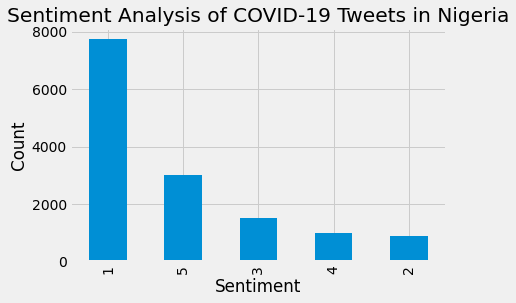

In [ ]:
df['sentiment'].value_counts().plot(kind = 'bar')

plt.title('Sentiment Analysis of COVID-19 Tweets in Nigeria')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install transformers
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug

In [ ]:
augumenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action='insert')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
sample_text = df['text'].iloc[100]

In [ ]:
sample_text

'doctor you will need to get tested first before taking vaccine go to hospital'

In [ ]:
augumented_sample_text = augumenter.augment(sample_text)

In [ ]:
augumented_sample_text

['another doctor you know will need to get tested as first before taking vaccine should go to emergency hospital']

In [ ]:
df['sentiment'].value_counts()

1    7738
5    2996
3    1498
4    1004
2     870
Name: sentiment, dtype: int64

In [ ]:
from tqdm.auto import tqdm
from sklearn.utils import shuffle
def augmentMyData(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['sentiment'] == 5].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['sentiment'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'label': 5,
        'text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df = augmentMyData(df, augumenter, samples=2000)

  0%|          | 0/4742 [00:00<?, ?it/s]

In [ ]:
#Plotting WordCloud
allWords = ' '.join(txts for txts in df['text'])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['text'].iloc[3]